In [1]:
import pandas as pd
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem import AllChem, Descriptors, DataStructs
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D

df = pd.read_csv("../RBP_Nodes.csv")
print(df)

          CHEMBLID             Name                   Synonyms  \
0    CHEMBL1172192              NaN                        NaN   
1    CHEMBL1201753     PITAVASTATIN   ITAVASTATIN|PITAVASTATIN   
2    CHEMBL1240928              NaN                        NaN   
3    CHEMBL1240971        OKICENONE                  Okicenone   
4    CHEMBL1242196  DEHYDROMUTACTIN            Dehydromutactin   
..             ...              ...                        ...   
131   jm1c00018_18              NaN                        NaN   
132   jm1c00018_19              NaN                        NaN   
133   jm1c00018_20              NaN                        NaN   
134   jm1c00018_21              NaN                        NaN   
135         Prot_1            TRBP2  TAR RNA-binding protein 2   

               Type  Max Phase  Molecular Weight  Targets  Bioactivities  \
0    Small molecule        0.0            697.14     99.0          112.0   
1    Small molecule        4.0            421.47     16

In [1]:
import os
os.getcwd()

'/home/peter/Python_projects/Neural_Network'

Fail ('CHEMBL1250379', 'Protein', nan)
Fail ('CHEMBL3774293', 'Protein', nan)
Fail ('CHEMBL3826841', 'Protein', nan)
Fail ('CHEMBL4105924', 'Protein', nan)
Fail ('CHEMBL4295873', 'Protein', nan)
Fail ('CHEMBL4295897', 'Protein', nan)
Fail ('CHEMBL4523458', 'Protein', nan)
Fail ('CHEMBL4523614', 'Protein', nan)
Fail ('Prot_1', 'Protein', nan)
[('CHEMBL1172192', 'Small molecule', 'COC1C(OC(=O)c2ccc(C)[nH]2)C(O)C(Oc2ccc3c(O)c(NC(=O)c4ccc(O)c(CC=C(C)C)c4)c(=O)oc3c2Cl)OC1(C)C'), ('CHEMBL1201753', 'Small molecule', 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c(C2CC2)nc2ccccc2c1-c1ccc(F)cc1'), ('CHEMBL1240928', 'Small molecule', 'Cc1occ2c1C(=O)c1c(O)ccc(O)c1C2'), ('CHEMBL1240971', 'Small molecule', 'Cc1cc(O)cc2cc3c(c(O)c12)C(=O)CCC3O'), ('CHEMBL1242196', 'Small molecule', 'Cc1cc(O)c2c(O)cccc2c1-c1cc(=O)cc(O)o1'), ('CHEMBL1242197', 'Small molecule', 'Cc1cc(O)cc2oc(Cc3cc(O)cc(=O)o3)cc(=O)c12'), ('CHEMBL1309685', 'Small molecule', 'COc1cc(OC)c2c(-c3ccccc3)cc(=O)oc2c1C(CC(=O)N1CCCC1)c1ccc2c(c1)OCO2'), ('CHEM

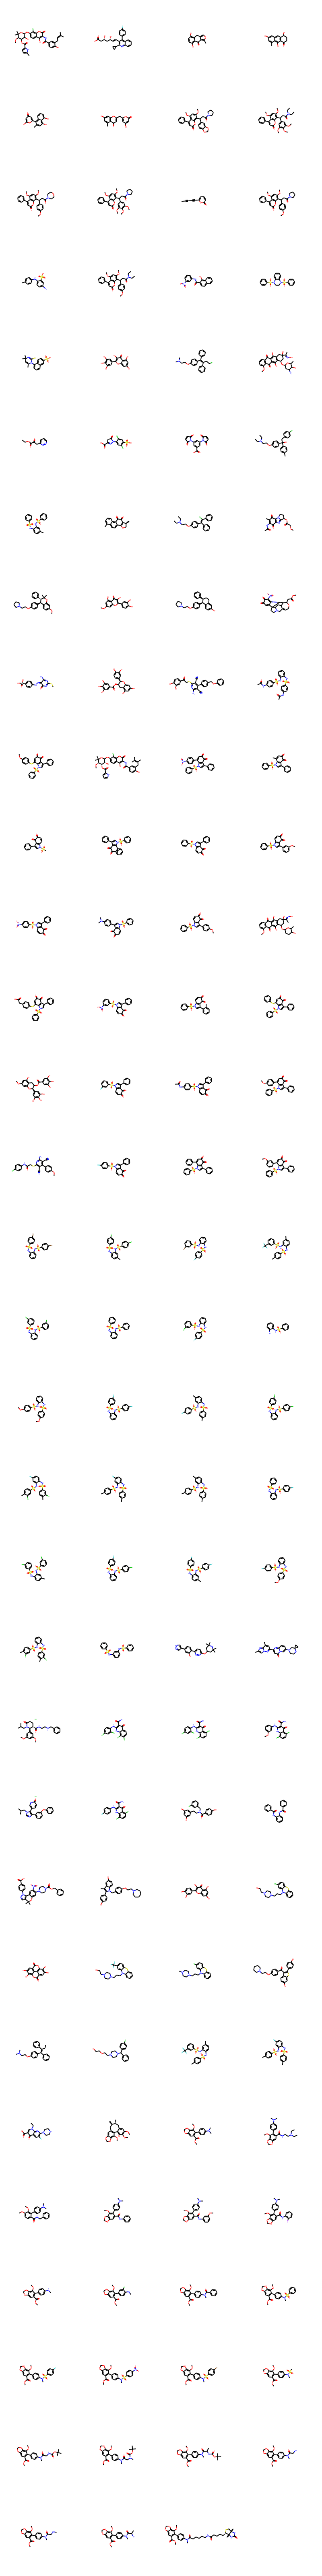

In [2]:
m = df[["CHEMBLID", "Type", "Smiles"]]
r = m.to_records(index=False)
#print(r[0][1])
#mol = Chem.MolFromSmiles(r[0][1])
mol = []
rcl = []
for i in r:
    #print(i[1])
    if i[1] != 'Protein':
        rcl.append(i)
        mt = Chem.MolFromSmiles(i[2])
        mol.append(mt)
    else:
        print('Fail',i)

print(rcl)
Draw.MolsToGridImage(mol, molsPerRow=4, maxMols = 200)

In [3]:
nmol = len(mol)
print(nmol)
#fps = [Chem.RDKFingerprint(i) for i in mol]
fps = [AllChem.GetMorganFingerprintAsBitVect(i,3,nBits=2048,useFeatures=True) for i in mol]
tmd = []
for i in range(0, nmol-1):
    for j in range(i+1, nmol):
        td = DataStructs.FingerprintSimilarity(fps[i],fps[j])
        if td >= 0.5:
            #print(r[i][0],r[j][0],td)
            k = (rcl[i][0],"cc",rcl[j][0],td)
            #print(k)
            tmd.append(k)
        #else:
            #print(rcl[i][0],rcl[j][0],'No Connect')
            
print(len(tmd))
print(tmd)
            

127
454
[('CHEMBL1172192', 'cc', 'CHEMBL4066821', 0.7931034482758621), ('CHEMBL1309685', 'cc', 'CHEMBL1330249', 0.7283950617283951), ('CHEMBL1309685', 'cc', 'CHEMBL1390568', 0.6590909090909091), ('CHEMBL1309685', 'cc', 'CHEMBL1398194', 0.8205128205128205), ('CHEMBL1309685', 'cc', 'CHEMBL1499653', 0.7974683544303798), ('CHEMBL1309685', 'cc', 'CHEMBL1522581', 0.7073170731707317), ('CHEMBL1330249', 'cc', 'CHEMBL1390568', 0.7), ('CHEMBL1330249', 'cc', 'CHEMBL1398194', 0.8857142857142857), ('CHEMBL1330249', 'cc', 'CHEMBL1499653', 0.7368421052631579), ('CHEMBL1330249', 'cc', 'CHEMBL1522581', 0.8309859154929577), ('CHEMBL1390568', 'cc', 'CHEMBL1398194', 0.6829268292682927), ('CHEMBL1390568', 'cc', 'CHEMBL1499653', 0.8157894736842105), ('CHEMBL1390568', 'cc', 'CHEMBL1522581', 0.8378378378378378), ('CHEMBL1398194', 'cc', 'CHEMBL1499653', 0.8356164383561644), ('CHEMBL1398194', 'cc', 'CHEMBL1522581', 0.7368421052631579), ('CHEMBL1499653', 'cc', 'CHEMBL1522581', 0.8857142857142857), ('CHEMBL164', 

In [4]:
dfo = pd.DataFrame(tmd, columns =['Source', 'Interaction', 'Target', 'Weight'])
print(dfo)
dfo.to_csv('../RBP_Tani_80M.csv', index=False)

            Source Interaction         Target    Weight
0    CHEMBL1172192          cc  CHEMBL4066821  0.793103
1    CHEMBL1309685          cc  CHEMBL1330249  0.728395
2    CHEMBL1309685          cc  CHEMBL1390568  0.659091
3    CHEMBL1309685          cc  CHEMBL1398194  0.820513
4    CHEMBL1309685          cc  CHEMBL1499653  0.797468
..             ...         ...            ...       ...
449   jm1c00018_17          cc   jm1c00018_19  0.633803
450   jm1c00018_17          cc   jm1c00018_20  0.661765
451   jm1c00018_18          cc   jm1c00018_19  0.844828
452   jm1c00018_18          cc   jm1c00018_20  0.824561
453   jm1c00018_19          cc   jm1c00018_20  0.754098

[454 rows x 4 columns]


#### (127*127)/454


In [16]:
454/127

3.574803149606299